In [3]:
import numpy as np
import pandas as pd
from yaml import safe_load
import yaml
import os
from tqdm import tqdm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
filenames=[]
for files in os.listdir('/content/drive/MyDrive/Dataset/t20s'):
  filenames.append(os.path.join('/content/drive/MyDrive/Dataset/t20s',files))

In [6]:
filenames[:5]

['/content/drive/MyDrive/Dataset/t20s/1183547.yaml',
 '/content/drive/MyDrive/Dataset/t20s/1185154.yaml',
 '/content/drive/MyDrive/Dataset/t20s/1184261.yaml',
 '/content/drive/MyDrive/Dataset/t20s/1186491.yaml',
 '/content/drive/MyDrive/Dataset/t20s/1185181.yaml']

In [7]:
from tqdm import tqdm
final_df=pd.DataFrame()
counter=1
for files in tqdm(filenames):
  try:
    with open(files,'r') as f:
      df=pd.json_normalize(safe_load(f))
      df['match_id']=counter
      final_df=final_df.append(df)
  except UnicodeDecodeError:
    print(f"Error processing {files}.Skipping.")
  except Exception as e:
        print(f"Error processing {files}: {e}. Skipping.")
  counter+=1


  0%|          | 0/1433 [00:00<?, ?it/s]<ipython-input-7-4c7ad36876d4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=final_df.append(df)
  0%|          | 1/1433 [00:01<23:52,  1.00s/it]<ipython-input-7-4c7ad36876d4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=final_df.append(df)
  0%|          | 2/1433 [00:01<18:36,  1.28it/s]<ipython-input-7-4c7ad36876d4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=final_df.append(df)
  0%|          | 3/1433 [00:02<17:18,  1.38it/s]<ipython-input-7-4c7ad36876d4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=final_df.append(df)
  0%|          | 4/1433 

Error processing /content/drive/MyDrive/Dataset/t20s/README.txt: . Skipping.


<ipython-input-7-4c7ad36876d4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=final_df.append(df)
 70%|██████▉   | 1000/1433 [06:02<03:00,  2.40it/s]<ipython-input-7-4c7ad36876d4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=final_df.append(df)
 70%|██████▉   | 1001/1433 [06:03<03:04,  2.35it/s]<ipython-input-7-4c7ad36876d4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=final_df.append(df)
 70%|██████▉   | 1002/1433 [06:03<03:08,  2.29it/s]<ipython-input-7-4c7ad36876d4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=final_df.append(df)
 70%|██████▉   | 1003/1433 [06:04<03:04,  2.33it/s]<ipy

In [8]:
final_df.head()

,innings,meta.data_version,meta.created,meta.revision,info.city,info.dates,info.gender,info.match_type,info.match_type_number,info.outcome.winner,...,match_id,info.outcome.by.runs,info.outcome.result,info.outcome.eliminator,info.outcome.method,info.bowl_out,info.outcome.bowl_out,info.supersubs.New Zealand,info.supersubs.South Africa,info.neutral_venue
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2020-02-16,1,Melbourne,[2020-02-08],female,T20,840.0,India,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'West Indies', 'deli...",0.9,2019-08-27,1,Dublin,[2019-05-26],female,T20,663.0,West Indies,...,2,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Kenya', 'deliveries...",0.9,2019-09-15,1,Kampala,[2019-05-21],male,T20,781.0,Kenya,...,3,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Thailand', 'deliver...",0.9,2019-07-30,1,Kuala Lumpur,[2019-06-27],male,T20,813.0,Malaysia,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Guernsey', 'deliver...",0.9,2019-06-16,2,Castel,[2019-06-15],male,T20,793.0,Germany,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
final_df['info.match_type'].value_counts()

T20    1432
Name: info.match_type, dtype: int64

In [10]:
backup = final_df.copy()

In [11]:
final_df.drop(columns=[
    'meta.data_version',
    'meta.created',
    'meta.revision',
    'info.outcome.bowl_out',
    'info.bowl_out',
    'info.supersubs.South Africa',
    'info.supersubs.New Zealand',
    'info.outcome.eliminator',
    'info.outcome.result',
    'info.outcome.method',
    'info.neutral_venue',
    'info.match_type_number',
    'info.outcome.by.runs',
    'info.outcome.by.wickets'
],inplace=True)

In [12]:
final_df

,innings,info.city,info.dates,info.gender,info.match_type,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id
0,"[{'1st innings': {'team': 'Australia', 'delive...",Melbourne,[2020-02-08],female,T20,India,20,[A Gardner],"[Australia, India]",field,India,"[AK Wilds, DM Koch]",Junction Oval,1
0,"[{'1st innings': {'team': 'West Indies', 'deli...",Dublin,[2019-05-26],female,T20,West Indies,20,NaN,"[Ireland, West Indies]",bat,West Indies,"[AA Baig, PA Reynolds]",YMCA Cricket Club,2
0,"[{'1st innings': {'team': 'Kenya', 'deliveries...",Kampala,[2019-05-21],male,T20,Kenya,20,[RR Patel],"[Ghana, Kenya]",field,Ghana,"[A Louw, Kehinde Olanbiwonnu]",Kyambogo Cricket Oval,3
0,"[{'1st innings': {'team': 'Thailand', 'deliver...",Kuala Lumpur,[2019-06-27],male,T20,Malaysia,20,[Anwar Rahman],"[Malaysia, Thailand]",bat,Thailand,"[Zaidan Taha, V Kalidas]",Kinrara Academy Oval,4
0,"[{'1st innings': {'team': 'Guernsey', 'deliver...",Castel,[2019-06-15],male,T20,Germany,20,NaN,"[Guernsey, Germany]",field,Germany,"[Adriaan van den Dries, AG Wharf]",King George V Sports Ground,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'1st innings': {'team': 'Pakistan', 'deliver...",Canberra,[2019-11-05],male,T20,Australia,20,[SPD Smith],"[Australia, Pakistan]",bat,Pakistan,"[GA Abood, SAJ Craig]",Manuka Oval,1429
0,"[{'1st innings': {'team': 'Pakistan', 'deliver...",Perth,[2019-11-08],male,T20,Australia,20,[SA Abbott],"[Australia, Pakistan]",field,Australia,"[P Wilson, SJ Nogajski]",Perth Stadium,1430
0,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",Brisbane,[2019-10-30],male,T20,Australia,20,[DA Warner],"[Australia, Sri Lanka]",bat,Sri Lanka,"[P Wilson, GA Abood]","Brisbane Cricket Ground, Woolloongabba",1431
0,"[{'1st innings': {'team': 'Nigeria', 'deliveri...",Kampala,[2019-05-21],male,T20,Nigeria,20,[I Danladi],"[Botswana, Nigeria]",bat,Nigeria,"[Emmanuel Byiringiro, I Chabi]",Lugogo Cricket Oval,1432


In [13]:
final_df['info.gender'].value_counts()

male      966
female    466
Name: info.gender, dtype: int64

In [14]:
final_df = final_df[final_df['info.gender'] == 'male']
final_df.drop(columns=['info.gender'],inplace=True)
final_df

<ipython-input-14-75c075e09be7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['info.gender'],inplace=True)


,innings,info.city,info.dates,info.match_type,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id
0,"[{'1st innings': {'team': 'Kenya', 'deliveries...",Kampala,[2019-05-21],T20,Kenya,20,[RR Patel],"[Ghana, Kenya]",field,Ghana,"[A Louw, Kehinde Olanbiwonnu]",Kyambogo Cricket Oval,3
0,"[{'1st innings': {'team': 'Thailand', 'deliver...",Kuala Lumpur,[2019-06-27],T20,Malaysia,20,[Anwar Rahman],"[Malaysia, Thailand]",bat,Thailand,"[Zaidan Taha, V Kalidas]",Kinrara Academy Oval,4
0,"[{'1st innings': {'team': 'Guernsey', 'deliver...",Castel,[2019-06-15],T20,Germany,20,NaN,"[Guernsey, Germany]",field,Germany,"[Adriaan van den Dries, AG Wharf]",King George V Sports Ground,5
0,"[{'1st innings': {'team': 'Jersey', 'deliverie...",St Peter Port,[2019-06-20],T20,Germany,20,[B Ward],"[Germany, Jersey]",field,Germany,"[DA Haggo, AG Wharf]",College Field,6
0,"[{'1st innings': {'team': 'Jersey', 'deliverie...",Castel,[2019-06-16],T20,Jersey,20,NaN,"[Denmark, Jersey]",field,Denmark,"[Rizwan Akram, DA Haggo]",King George V Sports Ground,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'1st innings': {'team': 'Pakistan', 'deliver...",Canberra,[2019-11-05],T20,Australia,20,[SPD Smith],"[Australia, Pakistan]",bat,Pakistan,"[GA Abood, SAJ Craig]",Manuka Oval,1429
0,"[{'1st innings': {'team': 'Pakistan', 'deliver...",Perth,[2019-11-08],T20,Australia,20,[SA Abbott],"[Australia, Pakistan]",field,Australia,"[P Wilson, SJ Nogajski]",Perth Stadium,1430
0,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",Brisbane,[2019-10-30],T20,Australia,20,[DA Warner],"[Australia, Sri Lanka]",bat,Sri Lanka,"[P Wilson, GA Abood]","Brisbane Cricket Ground, Woolloongabba",1431
0,"[{'1st innings': {'team': 'Nigeria', 'deliveri...",Kampala,[2019-05-21],T20,Nigeria,20,[I Danladi],"[Botswana, Nigeria]",bat,Nigeria,"[Emmanuel Byiringiro, I Chabi]",Lugogo Cricket Oval,1432


In [15]:
final_df['info.match_type'].value_counts()

T20    966
Name: info.match_type, dtype: int64

In [16]:
final_df['info.overs'].value_counts()

20    963
50      3
Name: info.overs, dtype: int64

In [17]:
final_df = final_df[final_df['info.overs'] == 20]
final_df.drop(columns=['info.overs','info.match_type'],inplace=True)
final_df

<ipython-input-17-2ded84e4f63f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['info.overs','info.match_type'],inplace=True)


,innings,info.city,info.dates,info.outcome.winner,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id
0,"[{'1st innings': {'team': 'Kenya', 'deliveries...",Kampala,[2019-05-21],Kenya,[RR Patel],"[Ghana, Kenya]",field,Ghana,"[A Louw, Kehinde Olanbiwonnu]",Kyambogo Cricket Oval,3
0,"[{'1st innings': {'team': 'Thailand', 'deliver...",Kuala Lumpur,[2019-06-27],Malaysia,[Anwar Rahman],"[Malaysia, Thailand]",bat,Thailand,"[Zaidan Taha, V Kalidas]",Kinrara Academy Oval,4
0,"[{'1st innings': {'team': 'Guernsey', 'deliver...",Castel,[2019-06-15],Germany,NaN,"[Guernsey, Germany]",field,Germany,"[Adriaan van den Dries, AG Wharf]",King George V Sports Ground,5
0,"[{'1st innings': {'team': 'Jersey', 'deliverie...",St Peter Port,[2019-06-20],Germany,[B Ward],"[Germany, Jersey]",field,Germany,"[DA Haggo, AG Wharf]",College Field,6
0,"[{'1st innings': {'team': 'Jersey', 'deliverie...",Castel,[2019-06-16],Jersey,NaN,"[Denmark, Jersey]",field,Denmark,"[Rizwan Akram, DA Haggo]",King George V Sports Ground,7
...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'1st innings': {'team': 'Pakistan', 'deliver...",Canberra,[2019-11-05],Australia,[SPD Smith],"[Australia, Pakistan]",bat,Pakistan,"[GA Abood, SAJ Craig]",Manuka Oval,1429
0,"[{'1st innings': {'team': 'Pakistan', 'deliver...",Perth,[2019-11-08],Australia,[SA Abbott],"[Australia, Pakistan]",field,Australia,"[P Wilson, SJ Nogajski]",Perth Stadium,1430
0,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",Brisbane,[2019-10-30],Australia,[DA Warner],"[Australia, Sri Lanka]",bat,Sri Lanka,"[P Wilson, GA Abood]","Brisbane Cricket Ground, Woolloongabba",1431
0,"[{'1st innings': {'team': 'Nigeria', 'deliveri...",Kampala,[2019-05-21],Nigeria,[I Danladi],"[Botswana, Nigeria]",bat,Nigeria,"[Emmanuel Byiringiro, I Chabi]",Lugogo Cricket Oval,1432


In [18]:
import pickle
pickle.dump(final_df,open('dataset_level1.pkl','wb'))

In [19]:
matches = pickle.load(open('dataset_level1.pkl','rb'))
matches.iloc[0]['innings'][0]['1st innings']['deliveries']

[{0.1: {'bowler': 'DNA Ankrah',
   'runs': {'extras': 0, 'total': 1, 'batsman': 1},
   'non_striker': 'AA Obanda',
   'batsman': 'DM Gondaria'}},
 {0.2: {'non_striker': 'DM Gondaria',
   'bowler': 'DNA Ankrah',
   'runs': {'extras': 0, 'total': 1, 'batsman': 1},
   'batsman': 'AA Obanda'}},
 {0.3: {'non_striker': 'AA Obanda',
   'bowler': 'DNA Ankrah',
   'runs': {'extras': 0, 'total': 4, 'batsman': 4},
   'batsman': 'DM Gondaria'}},
 {0.4: {'non_striker': 'AA Obanda',
   'bowler': 'DNA Ankrah',
   'runs': {'extras': 0, 'total': 0, 'batsman': 0},
   'batsman': 'DM Gondaria',
   'wicket': {'player_out': 'DM Gondaria',
    'fielders': ['IKO Aboagye'],
    'kind': 'caught'}}},
 {0.5: {'non_striker': 'AA Obanda',
   'bowler': 'DNA Ankrah',
   'runs': {'extras': 0, 'total': 0, 'batsman': 0},
   'batsman': 'IA Karim'}},
 {0.6: {'non_striker': 'AA Obanda',
   'bowler': 'DNA Ankrah',
   'runs': {'extras': 0, 'total': 0, 'batsman': 0},
   'batsman': 'IA Karim'}},
 {1.1: {'non_striker': 'IA Kari

In [20]:
count = 1
delivery_df = pd.DataFrame()
for index, row in matches.iterrows():
    if count in [75,108,150,180,268,360,443,458,584,748,982,1052,1111,1226,1345]:
        count+=1
        continue
    count+=1
    ball_of_match = []
    batsman = []
    bowler = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    match_id = []
    city = []
    venue = []

    for ball in row['innings'][0]['1st innings']['deliveries']:
        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][0]['1st innings']['team'])
            teams.append(row['info.teams'])
            ball_of_match.append(key)
            batsman.append(ball[key]['batsman'])
            bowler.append(ball[key]['bowler'])
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])
            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append('0')
    loop_df = pd.DataFrame({
            'match_id':match_id,
            'teams':teams,
            'batting_team':batting_team,
            'ball':ball_of_match,
            'batsman':batsman,
            'bowler':bowler,
            'runs':runs,
            'player_dismissed':player_of_dismissed,
            'city':city,
            'venue':venue
        })
    delivery_df = delivery_df.append(loop_df)


<ipython-input-20-fc6a6074bf38>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  delivery_df = delivery_df.append(loop_df)
<ipython-input-20-fc6a6074bf38>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  delivery_df = delivery_df.append(loop_df)
<ipython-input-20-fc6a6074bf38>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  delivery_df = delivery_df.append(loop_df)
<ipython-input-20-fc6a6074bf38>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  delivery_df = delivery_df.append(loop_df)
<ipython-input-20-fc6a6074bf38>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

In [21]:
def bowl(row):
    for team in row['teams']:
        if team != row['batting_team']:
            return team

In [22]:
delivery_df['bowling_team'] = delivery_df.apply(bowl,axis=1)

In [23]:
delivery_df

,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
0,2,"[Ghana, Kenya]",Kenya,0.1,DM Gondaria,DNA Ankrah,1,0,Kampala,Kyambogo Cricket Oval,Ghana
1,2,"[Ghana, Kenya]",Kenya,0.2,AA Obanda,DNA Ankrah,1,0,Kampala,Kyambogo Cricket Oval,Ghana
2,2,"[Ghana, Kenya]",Kenya,0.3,DM Gondaria,DNA Ankrah,4,0,Kampala,Kyambogo Cricket Oval,Ghana
3,2,"[Ghana, Kenya]",Kenya,0.4,DM Gondaria,DNA Ankrah,0,DM Gondaria,Kampala,Kyambogo Cricket Oval,Ghana
4,2,"[Ghana, Kenya]",Kenya,0.5,IA Karim,DNA Ankrah,0,0,Kampala,Kyambogo Cricket Oval,Ghana
...,...,...,...,...,...,...,...,...,...,...,...
116,964,"[Uganda, Ghana]",Ghana,19.2,KS Bagabena,DM Nakrani,1,0,Kampala,Kyambogo Cricket Oval,Uganda
117,964,"[Uganda, Ghana]",Ghana,19.3,DK Anefie,DM Nakrani,0,0,Kampala,Kyambogo Cricket Oval,Uganda
118,964,"[Uganda, Ghana]",Ghana,19.4,DK Anefie,DM Nakrani,1,0,Kampala,Kyambogo Cricket Oval,Uganda
119,964,"[Uganda, Ghana]",Ghana,19.5,KS Bagabena,DM Nakrani,2,0,Kampala,Kyambogo Cricket Oval,Uganda


In [24]:
delivery_df.drop(columns=['teams'],inplace=True)

In [25]:
delivery_df['batting_team'].unique()

array(['Kenya', 'Thailand', 'Guernsey', 'Jersey', 'Malaysia',
       'South Africa', 'Australia', 'Norway', 'Maldives', 'Denmark',
       'Italy', 'England', 'New Zealand', 'India', 'West Indies',
       'Bangladesh', 'Netherlands', 'Nepal', 'Singapore', 'Kuwait',
       'Afghanistan', 'Sri Lanka', 'Zimbabwe', 'Bermuda',
       'Cayman Islands', 'Namibia', 'Ireland', 'Oman',
       'United States of America', 'Canada', 'Botswana', 'Hong Kong',
       'Pakistan', 'United Arab Emirates', 'Scotland', 'Papua New Guinea',
       'Nigeria', 'Gibraltar', 'Vanuatu', 'Spain', 'Portugal', 'Germany',
       'Bhutan', 'Qatar', 'Iran', 'Belgium', 'Isle of Man', 'Bulgaria',
       'Romania', 'Philippines', 'Uganda', 'Ghana'], dtype=object)

In [26]:
teams = [
    'Australia','India','Bangladesh','New Zealand','South Africa','England',
    'West Indies','Afghanistan','Pakistan','Sri Lanka'
]

In [27]:
delivery_df = delivery_df[delivery_df['batting_team'].isin(teams)]
delivery_df = delivery_df[delivery_df['bowling_team'].isin(teams)]

In [28]:
delivery_df

,match_id,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
0,8,South Africa,0.1,Q de Kock,MA Starc,0,0,Port Elizabeth,St George's Park,Australia
1,8,South Africa,0.2,Q de Kock,MA Starc,1,0,Port Elizabeth,St George's Park,Australia
2,8,South Africa,0.3,RR Hendricks,MA Starc,1,0,Port Elizabeth,St George's Park,Australia
3,8,South Africa,0.4,Q de Kock,MA Starc,1,0,Port Elizabeth,St George's Park,Australia
4,8,South Africa,0.5,RR Hendricks,MA Starc,1,0,Port Elizabeth,St George's Park,Australia
...,...,...,...,...,...,...,...,...,...,...
112,962,Sri Lanka,18.3,PADLR Sandakan,PJ Cummins,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
113,962,Sri Lanka,18.4,PADLR Sandakan,PJ Cummins,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
114,962,Sri Lanka,18.5,N Pradeep,PJ Cummins,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
115,962,Sri Lanka,18.6,PADLR Sandakan,PJ Cummins,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia


In [29]:
output = delivery_df[['match_id','batting_team','bowling_team','ball','runs','player_dismissed','city','venue']]

In [30]:
output

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,8,South Africa,Australia,0.1,0,0,Port Elizabeth,St George's Park
1,8,South Africa,Australia,0.2,1,0,Port Elizabeth,St George's Park
2,8,South Africa,Australia,0.3,1,0,Port Elizabeth,St George's Park
3,8,South Africa,Australia,0.4,1,0,Port Elizabeth,St George's Park
4,8,South Africa,Australia,0.5,1,0,Port Elizabeth,St George's Park
...,...,...,...,...,...,...,...,...
112,962,Sri Lanka,Australia,18.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
113,962,Sri Lanka,Australia,18.4,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
114,962,Sri Lanka,Australia,18.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
115,962,Sri Lanka,Australia,18.6,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"


In [31]:
pickle.dump(output,open('dataset_level2.pkl','wb'))

In [32]:
#Feature extraction and Modeling
df = pickle.load(open('dataset_level2.pkl','rb'))

In [33]:
df

# batting_team
# bowling team
# city
# current score
# ball left
# wickets left
# current rr
# last five

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,8,South Africa,Australia,0.1,0,0,Port Elizabeth,St George's Park
1,8,South Africa,Australia,0.2,1,0,Port Elizabeth,St George's Park
2,8,South Africa,Australia,0.3,1,0,Port Elizabeth,St George's Park
3,8,South Africa,Australia,0.4,1,0,Port Elizabeth,St George's Park
4,8,South Africa,Australia,0.5,1,0,Port Elizabeth,St George's Park
...,...,...,...,...,...,...,...,...
112,962,Sri Lanka,Australia,18.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
113,962,Sri Lanka,Australia,18.4,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
114,962,Sri Lanka,Australia,18.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
115,962,Sri Lanka,Australia,18.6,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"


In [34]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8671
venue                  0
dtype: int64

In [35]:
df[df['city'].isnull()]['venue'].value_counts()

Dubai International Cricket Stadium        3092
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: venue, dtype: int64

In [36]:
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

In [37]:
df['city'] = cities

In [38]:
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [39]:
df.drop(columns=['venue'],inplace=True)
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,8,South Africa,Australia,0.1,0,0,Port Elizabeth
1,8,South Africa,Australia,0.2,1,0,Port Elizabeth
2,8,South Africa,Australia,0.3,1,0,Port Elizabeth
3,8,South Africa,Australia,0.4,1,0,Port Elizabeth
4,8,South Africa,Australia,0.5,1,0,Port Elizabeth
...,...,...,...,...,...,...,...
112,962,Sri Lanka,Australia,18.3,0,0,Brisbane
113,962,Sri Lanka,Australia,18.4,1,0,Brisbane
114,962,Sri Lanka,Australia,18.5,1,0,Brisbane
115,962,Sri Lanka,Australia,18.6,0,0,Brisbane


In [40]:
eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()

In [41]:
df = df[df['city'].isin(eligible_cities)]
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,9,Australia,South Africa,0.1,1,0,Cape Town
1,9,Australia,South Africa,0.2,1,0,Cape Town
2,9,Australia,South Africa,0.3,4,0,Cape Town
3,9,Australia,South Africa,0.4,2,0,Cape Town
4,9,Australia,South Africa,0.5,0,0,Cape Town
...,...,...,...,...,...,...,...
85,955,Pakistan,Australia,14.2,1,0,Sydney
86,955,Pakistan,Australia,14.3,1,0,Sydney
87,955,Pakistan,Australia,14.4,6,0,Sydney
88,955,Pakistan,Australia,14.5,2,0,Sydney


In [42]:
df['current_score'] = df.groupby('match_id').cumsum()['runs']

<ipython-input-42-ac174c139314>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df['current_score'] = df.groupby('match_id').cumsum()['runs']
<ipython-input-42-ac174c139314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_score'] = df.groupby('match_id').cumsum()['runs']


In [43]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,9,Australia,South Africa,0.1,1,0,Cape Town,1
1,9,Australia,South Africa,0.2,1,0,Cape Town,2
2,9,Australia,South Africa,0.3,4,0,Cape Town,6
3,9,Australia,South Africa,0.4,2,0,Cape Town,8
4,9,Australia,South Africa,0.5,0,0,Cape Town,8
...,...,...,...,...,...,...,...,...
85,955,Pakistan,Australia,14.2,1,0,Sydney,97
86,955,Pakistan,Australia,14.3,1,0,Sydney,98
87,955,Pakistan,Australia,14.4,6,0,Sydney,104
88,955,Pakistan,Australia,14.5,2,0,Sydney,106


In [44]:
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])
df

<ipython-input-44-4fd5a57c1fcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
<ipython-input-44-4fd5a57c1fcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,9,Australia,South Africa,0.1,1,0,Cape Town,1,0,1
1,9,Australia,South Africa,0.2,1,0,Cape Town,2,0,2
2,9,Australia,South Africa,0.3,4,0,Cape Town,6,0,3
3,9,Australia,South Africa,0.4,2,0,Cape Town,8,0,4
4,9,Australia,South Africa,0.5,0,0,Cape Town,8,0,5
...,...,...,...,...,...,...,...,...,...,...
85,955,Pakistan,Australia,14.2,1,0,Sydney,97,14,2
86,955,Pakistan,Australia,14.3,1,0,Sydney,98,14,3
87,955,Pakistan,Australia,14.4,6,0,Sydney,104,14,4
88,955,Pakistan,Australia,14.5,2,0,Sydney,106,14,5


In [45]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')
df

<ipython-input-45-e7d17f656852>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,9,Australia,South Africa,0.1,1,0,Cape Town,1,0,1,1
1,9,Australia,South Africa,0.2,1,0,Cape Town,2,0,2,2
2,9,Australia,South Africa,0.3,4,0,Cape Town,6,0,3,3
3,9,Australia,South Africa,0.4,2,0,Cape Town,8,0,4,4
4,9,Australia,South Africa,0.5,0,0,Cape Town,8,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
85,955,Pakistan,Australia,14.2,1,0,Sydney,97,14,2,86
86,955,Pakistan,Australia,14.3,1,0,Sydney,98,14,3,87
87,955,Pakistan,Australia,14.4,6,0,Sydney,104,14,4,88
88,955,Pakistan,Australia,14.5,2,0,Sydney,106,14,5,89


In [46]:
df['balls_left'] = 120 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)
df

<ipython-input-46-7ed065e8960c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = 120 - df['balls_bowled']
<ipython-input-46-7ed065e8960c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,9,Australia,South Africa,0.1,1,0,Cape Town,1,0,1,1,119
1,9,Australia,South Africa,0.2,1,0,Cape Town,2,0,2,2,118
2,9,Australia,South Africa,0.3,4,0,Cape Town,6,0,3,3,117
3,9,Australia,South Africa,0.4,2,0,Cape Town,8,0,4,4,116
4,9,Australia,South Africa,0.5,0,0,Cape Town,8,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
85,955,Pakistan,Australia,14.2,1,0,Sydney,97,14,2,86,34
86,955,Pakistan,Australia,14.3,1,0,Sydney,98,14,3,87,33
87,955,Pakistan,Australia,14.4,6,0,Sydney,104,14,4,88,32
88,955,Pakistan,Australia,14.5,2,0,Sydney,106,14,5,89,31


In [47]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
df['player_dismissed'] = df['player_dismissed'].astype('int')
df['player_dismissed'] = df.groupby('match_id').cumsum()['player_dismissed']
df['wickets_left'] = 10 - df['player_dismissed']

<ipython-input-47-e0234112d42f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
<ipython-input-47-e0234112d42f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].astype('int')
<ipython-input-47-e0234112d42f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric

In [48]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,9,Australia,South Africa,0.1,1,0,Cape Town,1,0,1,1,119,10
1,9,Australia,South Africa,0.2,1,0,Cape Town,2,0,2,2,118,10
2,9,Australia,South Africa,0.3,4,0,Cape Town,6,0,3,3,117,10
3,9,Australia,South Africa,0.4,2,0,Cape Town,8,0,4,4,116,10
4,9,Australia,South Africa,0.5,0,0,Cape Town,8,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,955,Pakistan,Australia,14.2,1,5,Sydney,97,14,2,86,34,5
86,955,Pakistan,Australia,14.3,1,5,Sydney,98,14,3,87,33,5
87,955,Pakistan,Australia,14.4,6,5,Sydney,104,14,4,88,32,5
88,955,Pakistan,Australia,14.5,2,5,Sydney,106,14,5,89,31,5


In [49]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']

<ipython-input-49-fad47fc85776>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crr'] = (df['current_score']*6)/df['balls_bowled']


In [50]:
groups = df.groupby('match_id')

match_ids = df['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())

<ipython-input-50-3b88d12c2886>:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['batting_team', 'bowling_team', 'city'], dtype='object')
  last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())


In [51]:
df['last_five'] = last_five

<ipython-input-51-83d24d575aa4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_five'] = last_five


In [52]:
df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five']]

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
0,Australia,South Africa,Cape Town,1,119,10,6.000000,NaN
1,Australia,South Africa,Cape Town,2,118,10,6.000000,NaN
2,Australia,South Africa,Cape Town,6,117,10,12.000000,NaN
3,Australia,South Africa,Cape Town,8,116,10,12.000000,NaN
4,Australia,South Africa,Cape Town,8,115,10,9.600000,NaN
...,...,...,...,...,...,...,...,...
85,Pakistan,Australia,Sydney,97,34,5,6.767442,35.0
86,Pakistan,Australia,Sydney,98,33,5,6.758621,35.0
87,Pakistan,Australia,Sydney,104,32,5,7.090909,41.0
88,Pakistan,Australia,Sydney,106,31,5,7.146067,42.0


In [53]:
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')

<ipython-input-53-72dae5031817>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')


In [54]:
final_df=final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]

In [55]:
final_df.dropna(inplace=True)

In [56]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
dtype: int64

In [57]:
final_df = final_df.sample(final_df.shape[0])

In [58]:
final_df.shape

(38674, 9)

In [59]:
final_df.sample(2)

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
37868,South Africa,Sri Lanka,Cape Town,60,72,9,7.500000,33.0,169
36187,Pakistan,New Zealand,Auckland,34,91,9,7.034483,34.0,171


In [61]:
final_df.to_csv('T20_DataSet.csv')

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Assuming 'final_df' is your DataFrame with the mentioned columns
# You may need to customize this part based on your dataset
features = final_df[['batting_team', 'bowling_team', 'city', 'current_score', 'balls_left', 'wickets_left', 'crr', 'last_five', 'runs_x']]

# Convert categorical features to numerical using one-hot encoding
features = pd.get_dummies(features)

# Target variable (score at the end of the match)
target = final_df['runs_x']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM (samples, time steps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Make predictions on the test set
predictions = model.predict(X_test_reshaped)
print(predictions.shape)




Epoch 1/100
484/484 [==============================] - 6s 9ms/step - loss: 17345.6348 - val_loss: 3946.4314
Epoch 2/100
484/484 [==============================] - 3s 6ms/step - loss: 1029.1061 - val_loss: 381.6867
Epoch 3/100
484/484 [==============================] - 2s 5ms/step - loss: 353.4750 - val_loss: 311.2833
Epoch 4/100
484/484 [==============================] - 2s 3ms/step - loss: 269.5500 - val_loss: 218.8904
Epoch 5/100
484/484 [==============================] - 2s 4ms/step - loss: 190.0512 - val_loss: 160.5827
Epoch 6/100
484/484 [==============================] - 2s 4ms/step - loss: 139.7211 - val_loss: 115.4792
Epoch 7/100
484/484 [==============================] - 2s 4ms/step - loss: 93.3793 - val_loss: 69.7069
Epoch 8/100
484/484 [==============================] - 2s 4ms/step - loss: 50.6864 - val_loss: 32.8603
Epoch 9/100
484/484 [==============================] - 2s 5ms/step - loss: 21.1395 - val_loss: 12.3172
Epoch 10/100
484/484 [==============================] - 3

In [148]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50)                22400     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 22451 (87.70 KB)
Trainable params: 22451 (87.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [149]:
print(predictions.shape)
print(y_test.shape)

(7735, 1)
(7735,)


In [150]:
# Convert to Numpy arrays
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)

# Scale target column
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train_arr.reshape(-1,1))
y_test_scaled = scaler.transform(y_test_arr.reshape(-1,1))

# Reshape predictions
predictions_reshaped = predictions.reshape(-1,1)

# Inverse transform
predictions_inv = scaler.inverse_transform(predictions_reshaped)
y_test_inv = scaler.inverse_transform(y_test_scaled)

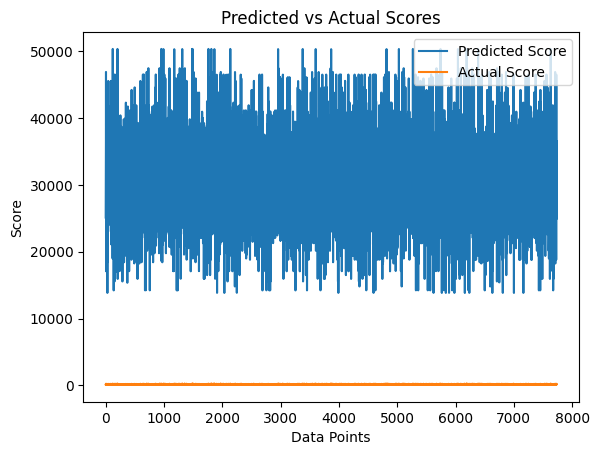

In [151]:
# Plot results
plt.plot(predictions_inv, label='Predicted Score')
plt.plot(y_test_inv, label='Actual Score')

plt.title('Predicted vs Actual Scores')
plt.xlabel('Data Points')
plt.ylabel('Score')
plt.legend()

plt.show()

MSE:  968047152.7202445
MAE:  30506.587744424694
R-squared:  -934164.5610558077


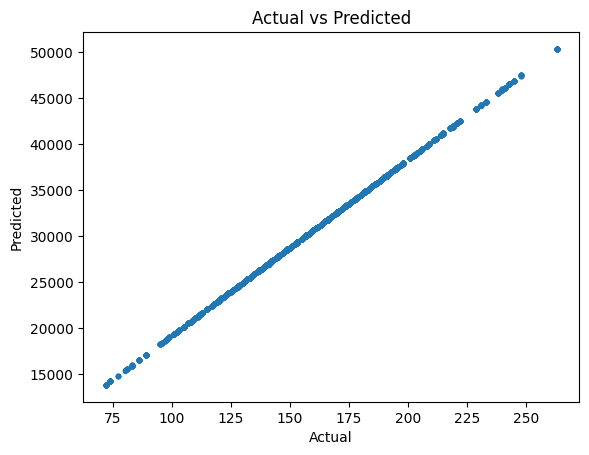

In [152]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate metrics
mse = mean_squared_error(y_test_inv, predictions_inv)
mae = mean_absolute_error(y_test_inv, predictions_inv)

print('MSE: ', mse)
print('MAE: ', mae)

# Additional metrics
from sklearn.metrics import r2_score
r2 = r2_score(y_test_inv, predictions_inv)
print('R-squared: ', r2)

import matplotlib.pyplot as plt
plt.plot(y_test_inv, predictions_inv, '.')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Epoch 1/10
967/967 [==============================] - 6s 3ms/step - loss: 0.0090 - val_loss: 26526.4141
Epoch 2/10
967/967 [==============================] - 4s 4ms/step - loss: 0.0032 - val_loss: 26531.8965
Epoch 3/10
967/967 [==============================] - 5s 5ms/step - loss: 0.0026 - val_loss: 26526.2754
Epoch 4/10
967/967 [==============================] - 3s 3ms/step - loss: 0.0023 - val_loss: 26524.8301
Epoch 5/10
967/967 [==============================] - 3s 3ms/step - loss: 0.0021 - val_loss: 26526.6348
Epoch 6/10
967/967 [==============================] - 3s 3ms/step - loss: 0.0019 - val_loss: 26526.4316
Epoch 7/10
967/967 [==============================] - 5s 5ms/step - loss: 0.0018 - val_loss: 26523.8223
Epoch 8/10
967/967 [==============================] - 4s 4ms/step - loss: 0.0017 - val_loss: 26523.9023
Epoch 9/10
967/967 [==============================] - 3s 4ms/step - loss: 0.0016 - val_loss: 26524.9199
Epoch 10/10
242/242 [==============================] - 1s 2ms/st

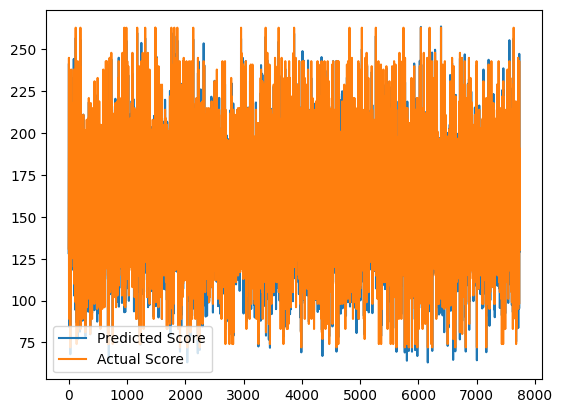

In [167]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

# Assuming 'final_df' is your DataFrame with the mentioned columns
# You may need to customize this part based on your dataset
features = final_df[['batting_team', 'bowling_team', 'city', 'current_score', 'balls_left', 'wickets_left', 'crr', 'last_five']]

# Convert categorical features to numerical using one-hot encoding
features = pd.get_dummies(features)

# Target variable (score at the end of the match)
target = final_df['runs_x']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for GRU (samples, time steps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Convert to Numpy arrays
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)

# Scale target column
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train_arr.reshape(-1,1))
y_test_scaled = scaler.transform(y_test_arr.reshape(-1,1))

# Build the GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train_scaled, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Make predictions on the test set
predictions = model.predict(X_test_reshaped)




# Reshape predictions
predictions_reshaped = predictions.reshape(-1,1)

# Inverse transform
predictions_inv = scaler.inverse_transform(predictions_reshaped)
y_test_inv = scaler.inverse_transform(y_test_scaled)
# Plot the results
plt.plot(predictions_inv, label='Predicted Score')
plt.plot(y_test_inv, label='Actual Score')
plt.legend()
plt.show()


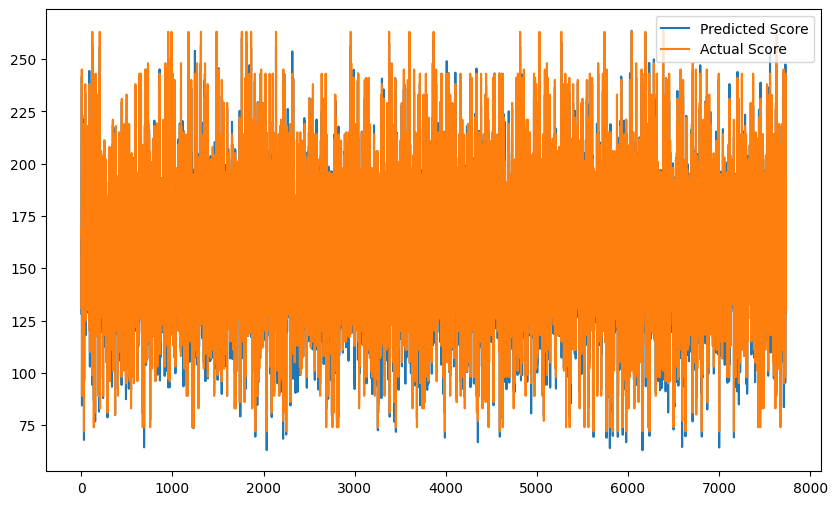

In [168]:
plt.figure(figsize=(10,6))
plt.plot(predictions_inv, label='Predicted Score')
plt.plot(y_test_inv, label='Actual Score')
plt.legend()
plt.show()

In [169]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate metrics
mse = mean_squared_error(y_test_inv, predictions_inv)
mae = mean_absolute_error(y_test_inv, predictions_inv)

print('MSE: ', mse)
print('MAE: ', mae)

# Additional metrics
from sklearn.metrics import r2_score
r2 = r2_score(y_test_inv, predictions_inv)
print('R-squared: ', r2)


MSE:  63.77712735042881
MAE:  5.237111800920601
R-squared:  0.9384550682408147


In [162]:
predictions_inv

array([[131.0782 ],
       [169.57573],
       [166.1321 ],
       ...,
       [151.2154 ],
       [130.70163],
       [146.46645]], dtype=float32)

In [161]:
y_test_inv

array([[131.],
       [169.],
       [165.],
       ...,
       [151.],
       [130.],
       [146.]])